# Overview



## Strategies: 
(Momentum (MOM), Carry, Historical Basis(HB))

- At each month t futures contracts are sorted separately based on MOM value, Carry value and HB value
- Strategies are equally weighted across contracts.

#### MOM
- Formed by taking a long position in the 3 commodities futures with the highest MOM value, and taking a short position in contracts with 3 lowest MOM value at month t.

    ![MOM Value](./images/MOM_Value.png)

- Where $MOM^i_t$ is momentum of the contract i at time t, $R^i_t$ is the future contracts excess monthly return at time t.


#### Carry
- Formed by taking a short position in 3 futures with the highest Carry value and a long position in 3 futures with the lowest Carry value in month t.

    ![MOM Value](./images/Carry_Value.png)

- Carry can be defined as the difference between the logarithmic front- ad second- nearest futures prices. i and j denote the corresponding contract maturity,. $F^i_t$ is the price of contract i at time t, and $F^j_t$ is the price of the futures contract j at time t.


#### HB
- Formed by taking a short position in 3 futures with the highest Carry value and a long position in 3 futures with the lowest Carry value in month t.

    ![MOM Value](./images/HB_Value.png)

- $HB^i_t$ is the historical basis of future contract i at time t, $Basis^i_t$ is the future contract i's basis at time t. Basis is the contemporaneous difference between future's price and the spot price of their underlying products.


## Data
- Sample data time period (Jan-2010 -> Dec-2019)

#### US Market
Sector          | Asset           | Code
----------------|-----------------|--------------
Energy          | Fuel oil        | CL.NYM 
Energy          | Thermal coal    | NG.NYM 
Metals          | Gold            | GC.CMX 
Metals          | Silver          | SI.CMX 
Metals          | Copper          | HG.CMX 
Agriculture     | Soya-bean oil   | ZL.CBT 
Agriculture     | Corn            | ZC.CBT 
Agriculture     | Soya-bean       | ZS.CBT 
Agriculture     | Cotton          | CT.NYB 
Agriculture     | Sugar           | SB.NYB 

**Notes:** This table lists all commodity futures included in the sample sorted by sector information. (Codes adjusted to fit Yahoo Finance Codes)
                                                                                                                                                                                                       


### Import Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Define Function for Data Download and Download Historical Data

In [2]:
def download_data(tickers, start_date, end_date):
    try:
        # Download the historical data using the yfinance library
        df = yf.download(tickers, start=start_date, end=end_date, group_by='tickers')
        # Rename the 'Adj Close' column to 'Adj_Close'
        df.rename(columns={"Adj Close": "Adj_Close"}, inplace=True)
        return df
    except Exception as e:
        print(f"Error occurred while trying to download data: {e}")
        return None

futures_codes = ["CL=F", "NG=F","GC=F","SI=F","HG=F","ZL=F","ZC=F","ZS=F","CT=F","SB=F"]
start_date = "2010-01-01"
end_date = "2019-12-31"

historical_data = download_data(futures_codes, start_date, end_date)


[*********************100%***********************]  10 of 10 completed


 ### Define and Run Functions for Data Cleaning

In [3]:
def null_check_and_clean(df):
    if df.isnull().sum().sum() > 0:
        null_columns = df.columns[df.isnull().any()]
        print("Null value count by column:")
        print(df[null_columns].isnull().sum())
        print("\nRows with null values:")
        print(df[df.isnull().any(axis=1)][null_columns])
        df.dropna(inplace=True)
        print("\nNull values dropped.")
    else:
        print("\nNo null values in dataframe.")
    return df

def check_data_length(df):
    lengths = {ticker: len(data) for ticker, data in df.items()}
    length_set = set(lengths.values())
    if len(length_set) > 1:
        print("Data lengths are not equal!")
        for ticker, length in lengths.items():
            print(f"Length of data for {ticker}: {length}")
    else:
        print(f"All data series have the same length: {next(iter(length_set))}")

historical_data = null_check_and_clean(historical_data)
check_data_length(historical_data)


Null value count by column:
SI=F  Open         1
      High         1
      Low          1
      Close        1
      Adj_Close    1
      Volume       1
CT=F  Open         1
      High         1
      Low          1
      Close        1
      Adj_Close    1
      Volume       1
ZC=F  Open         2
      High         2
      Low          2
      Close        2
      Adj_Close    2
      Volume       2
HG=F  Open         1
      High         1
      Low          1
      Close        1
      Adj_Close    1
      Volume       1
SB=F  Open         1
      High         1
      Low          1
      Close        1
      Adj_Close    1
      Volume       1
GC=F  Open         1
      High         1
      Low          1
      Close        1
      Adj_Close    1
      Volume       1
dtype: int64

Rows with null values:
              SI=F                                                  \
              Open    High        Low      Close  Adj_Close Volume   
Date                                   

### Compute Descriptive Statistics

In [4]:
historical_data.describe()

SI=F                                                      \
              Open         High          Low        Close    Adj_Close   
count  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000   
mean     21.117819    21.262692    20.954125    21.108010    21.108010   
std       7.080096     7.198291     6.945882     7.072491     7.072491   
min      13.635000    13.737000    13.635000    13.666000    13.666000   
25%      16.293750    16.360750    16.209999    16.295501    16.295501   
50%      17.889999    17.959999    17.774000    17.842000    17.842000   
75%      24.094999    24.316250    23.769750    23.932250    23.932250   
max      48.459999    49.520000    47.540001    48.584000    48.584000   

                             CT=F                                         ...  \
              Volume         Open         High          Low        Close  ...   
count    2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  ...   
mean     2014.618022    82.348748    83.216898    81.486132    82.282679  ...   
std     10898.326615    25.995632    26.653670    25.251073    25.912182  ...   
min         0.000000    56.560001    56.900002    55.660000    56.590000  ...   
25%         9.000000    67.315001    67.879997    66.782501    67.282497  ...   
50%        42.000000    76.434998    77.060001    75.849998    76.485001  ...   
75%       150.000000    86.129997    86.709999    85.302502    86.029999  ...   
max    170297.000000   215.619995   227.000000   210.750000   215.149994  ...   

              GC=F                                                  ZS=F  \
               Low        Close    Adj_Close         Volume         Open   
count  2508.000000  2508.000000  2508.000000    2508.000000  2508.000000   
mean   1339.863437  1346.913955  1346.913955    5824.169458  1121.210925   
std     177.416954   179.156619   179.156619   30896.358806   229.935717   
min    1045.199951  1050.800049  1050.800049       0.000000   790.250000   
25%    1218.450012  1224.475006  1224.475006      35.750000   937.250000   
50%    1287.900024  1293.450012  1293.450012     125.500000  1022.375000   
75%    1430.325043  1435.300049  1435.300049     426.000000  1337.062500   
max    1864.000000  1888.699951  1888.699951  386334.000000  1778.500000   

                                                                          
              High          Low        Close    Adj_Close         Volume  
count  2508.000000  2508.000000  2508.000000  2508.000000    2508.000000  
mean   1131.778907  1111.906798  1121.526814  1121.526814   71628.695774  
std     233.166427   227.075645   230.355088   230.355088   55745.822166  
min     791.000000   780.500000   791.000000   791.000000       0.000000  
25%     944.500000   930.750000   937.750000   937.750000   11380.000000  
50%    1032.500000  1012.250000  1022.375000  1022.375000   79041.000000  
75%    1350.000000  1326.625000  1337.562500  1337.562500  112525.500000  
max    1794.750000  1760.500000  1771.000000  1771.000000  352462.000000  

[8 rows x 60 columns]

### Compute and Visualize Correlations

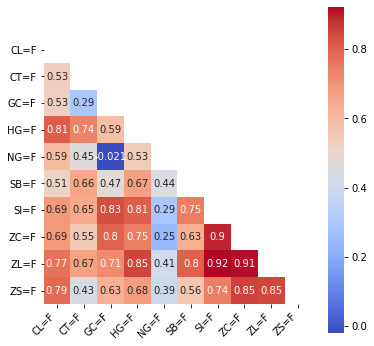

In [5]:
def create_df(df):
    # Create a new dataframe with only close prices
    close_prices = pd.DataFrame()

    for ticker in df.columns.levels[0]:
        close_prices[ticker] = df[ticker]['Close']
    
    return close_prices

def compute_correlations(df):
    # Compute correlations
    correlations = df.corr()

    return correlations

def plot_heatmap(correlations, cmap='coolwarm'):
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(correlations, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(6, 6))

    # Draw the heatmap with the mask
    sns.heatmap(correlations, annot=True, cmap=cmap, mask=mask, square=True, ax=ax)

    # Adjust the x-axis labels for readability
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

close_prices =create_df(historical_data)
correlations = compute_correlations(close_prices)
plot_heatmap(correlations)


### Identify Potential Outliers

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


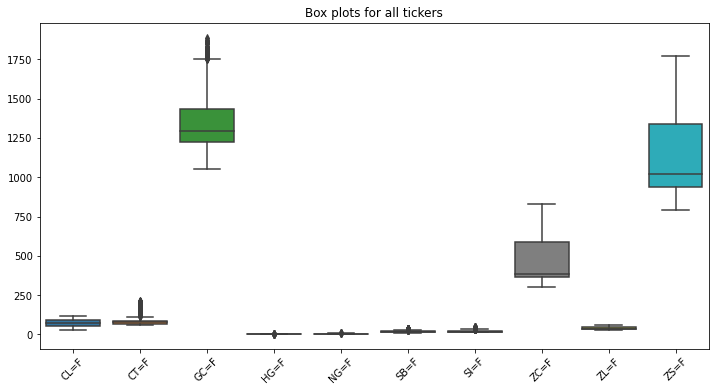

              CL=F         CT=F         GC=F         HG=F         NG=F  \
count  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000   
mean     72.534418    82.282679  1346.913955     3.065516     3.301662   
std      21.910537    25.912182   179.156619     0.568663     0.811608   
min      26.209999    56.590000  1050.800049     1.939500     1.639000   
25%      52.410000    67.282497  1224.475006     2.660375     2.705750   
50%      71.465000    76.485001  1293.450012     3.058750     3.105000   
75%      93.545000    86.029999  1435.300049     3.393000     3.927000   
max     113.930000   215.149994  1888.699951     4.623000     6.149000   

              SB=F         SI=F         ZC=F         ZL=F         ZS=F  
count  2508.000000  2508.000000  2508.000000  2508.000000  2508.000000  
mean     17.644549    21.108010   464.252691    38.777974  1121.526814  
std       5.282708     7.072491   140.461335     9.567527   230.355088  
min       9.900000    13.666000   301.500

In [6]:
# Create a boxplot for all tickers (already present in the original code)
plt.figure(figsize=(12,6))
sns.boxplot(data=close_prices)
plt.title("Box plots for all tickers")
plt.xticks(rotation=45)
plt.show()

# Print statistical summary
print(close_prices.describe())


### Normalize Data Using Z-Score

In [7]:
def normalize_zscore(df):
    # Calculate the mean and standard deviation per column
    mean = df.mean()
    std_dev = df.std()

    # Calculate the z-scores
    zscores = (df - mean) / std_dev

    return zscores

normalized_data = normalize_zscore(close_prices)


### Plot Raw and Normalized Data

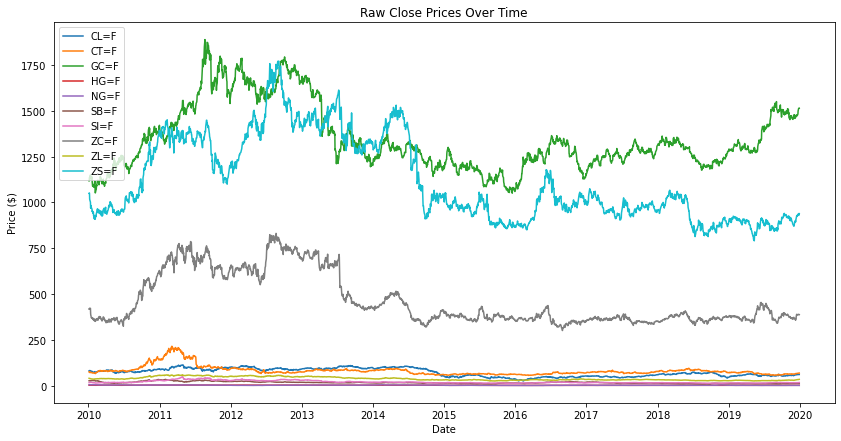

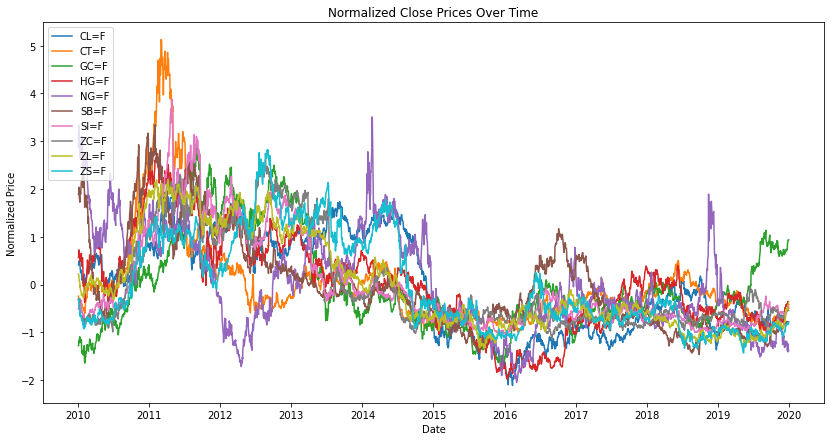

In [8]:
def plot_data(df, title, is_normalized=False):
    fig, ax = plt.subplots(figsize=(14, 7))
    for column in df.columns:
        ax.plot(df[column], label=column)
    ax.legend(loc='upper left')
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Normalized Price' if is_normalized else 'Price ($)')
    plt.show()

plot_data(close_prices, 'Raw Close Prices Over Time')
plot_data(normalized_data, 'Normalized Close Prices Over Time', is_normalized=True)


# Strategy Logic

# Metrics / Visualization